In [1]:
from Element_PI import PersDiagram, dgms
import os

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [13]:
os.listdir()

['benzene.xyz',
 'PIs.ipynb',
 'Element_PI.py',
 'ACSFs.ipynb',
 '2-benzyloxirane.xyz',
 'epoxideish-2-benzyloxirane.xyz',
 'elements.py',
 'glycidol.xyz',
 '__pycache__',
 'fragment_2-benzyloxirane.xyz',
 'README.md',
 'SOAPs.ipynb',
 'fragment2_2-benzyloxirane.xyz',
 'BoBs.ipynb',
 '.ipynb_checkpoints',
 'CMs.ipynb',
 '.git',
 'benzeneish-2-benzyloxirane.xyz',
 'epoxide.xyz']

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


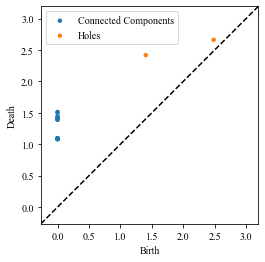

In [3]:
PersDiagram('2-benzyloxirane.xyz',lifetime=False)

In [9]:
dgms('2-benzyloxirane.xyz')[1]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


array([[2.48344278, 2.66135311],
       [1.40394533, 2.41776872]])

In [12]:
dgms('benzeneish-2-benzyloxirane.xyz')[1]

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


array([[1.40394533, 2.41776872]])

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


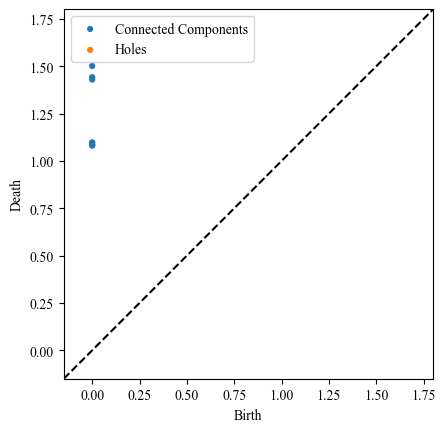

In [14]:
PersDiagram('epoxideish-2-benzyloxirane.xyz',lifetime=False)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


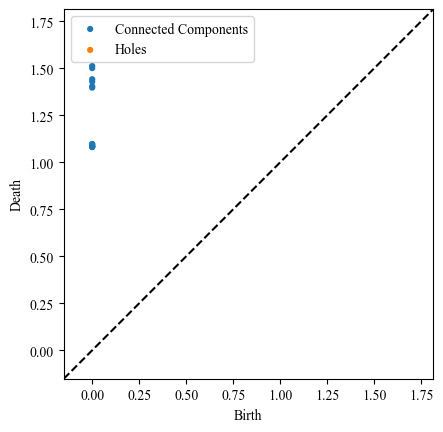

In [5]:

PersDiagram('fragment2_2-benzyloxirane.xyz',lifetime=False)

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


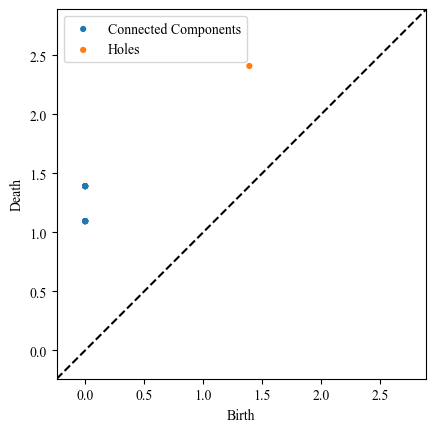

In [6]:
PersDiagram('benzene.xyz',lifetime=False)